our objective is to find whether a **customer is risk free or not** for giving out loans based on the data
we will be using
* 1)data analysis and EDA
* 2) decision tree
* 3) random forest to help the bank for reaching a conclution and informed decision

lets import the libraries we need

In [10]:
# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    make_scorer,
)

 lets connect the google drive and import  dataset that  we will be working on



In [12]:
#from google.colab import drive
#drive.mount('/content/drive')

In [13]:
df = pd.read_csv("/Users/harshchandak/Downloads/German_Credit.csv")

exoloring the data shape size columns info etc

In [15]:
df.shape

(1000, 10)

In [16]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk,Purpose
0,67,male,skilled,own,little,little,1169,6,0,radio/TV
1,22,female,skilled,own,little,moderate,5951,48,1,radio/TV
2,49,male,unskilled_and_non-resident,own,little,little,2096,12,0,education
3,45,male,skilled,free,little,little,7882,42,0,furniture/equipment
4,53,male,skilled,free,little,little,4870,24,1,car


In [17]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Risk', 'Purpose'],
      dtype='object')

•	The data contains characteristics of the people
	* Age (Numeric: Age in years)



* 	Sex (Categories: male, female)
* 	Job (Categories : unskilled and non-resident,  unskilled and resident, skilled, highly skilled)
* Housing (Categories: own, rent, or free)
* Saving accounts (Categories: little, moderate, quite rich, rich)
*	Checking account (Categories: little, moderate, rich)
* Credit amount (Numeric: Amount of credit in DM - Deutsche Mark)
* Duration (Numeric: Duration for which the credit is given in months)
*	Purpose (Categories: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)
*	Risk (0 - Person is not at risk, 1 - Person is at risk(defaulter))


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   object
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Risk              1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [20]:
df.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Risk                0
Purpose             0
dtype: int64

no data is missing

In [22]:
df.describe(include='all').round(2).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1000.0,NaN,NaN,NaN,35.55,11.38,19.0,27.0,33.0,42.0,75.0
Sex,1000,2,male,690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,1000,3,skilled,630,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Housing,1000,3,own,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saving accounts,1000,4,little,786,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Checking account,1000,3,moderate,472,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit amount,1000.0,NaN,NaN,NaN,3271.26,2822.74,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,NaN,NaN,NaN,20.9,12.06,4.0,12.0,18.0,24.0,72.0
Risk,1000.0,NaN,NaN,NaN,0.3,0.46,0.0,0.0,0.0,1.0,1.0
Purpose,1000,8,car,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN


we find that no values are missing avg age is 35 avg loan duration is 20 months and we notice that risk has a median value which confirms that something is wrong


In [24]:
#we rename column names with spaces for our ease of operation
df.rename(
    columns={
        "Saving accounts": "savings_Acc",
        "Checking account": "checking_Acc",
        "Credit amount": "credit_Amt",
    },
    inplace=True,
)
df.head()

,Age,Sex,Job,Housing,savings_Acc,checking_Acc,credit_Amt,Duration,Risk,Purpose
0,67,male,skilled,own,little,little,1169,6,0,radio/TV
1,22,female,skilled,own,little,moderate,5951,48,1,radio/TV
2,49,male,unskilled_and_non-resident,own,little,little,2096,12,0,education
3,45,male,skilled,free,little,little,7882,42,0,furniture/equipment
4,53,male,skilled,free,little,little,4870,24,1,car


In [25]:
# Automatically convert if unique values are below a threshold
threshold = 5 # Example threshold
for col in df.columns:
    if df[col].nunique() < threshold:  # Check number of unique values
        df[col] = df[col].astype('category')

print(df.dtypes)  # Check updated data types


Age                int64
Sex             category
Job             category
Housing         category
savings_Acc     category
checking_Acc    category
credit_Amt         int64
Duration           int64
Risk            category
Purpose           object
dtype: object


In [26]:
# Checking the class values of the target variable
df["Risk"].value_counts(normalize=True)

Risk
0    0.7
1    0.3
Name: proportion, dtype: float64

##Risk (0 - Person is not at risk, 1 - Person is at risk(defaulter))
#our target variable is imbalanced and we need to balance it later using class weights
# we need to find  (person at risk category) 1 and minimize loss from the bank’s perspective, the bank needs a decision rule regarding whom to approve the loan and whom not to not give loans to defaulters or 1

In [28]:
df.nunique()

Age              53
Sex               2
Job               3
Housing           3
savings_Acc       4
checking_Acc      3
credit_Amt      921
Duration         33
Risk              2
Purpose           8
dtype: int64

EDA brief

In [30]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'savings_Acc', 'checking_Acc',
       'credit_Amt', 'Duration', 'Risk', 'Purpose'],
      dtype='object')

<Figure size 1000x600 with 0 Axes>

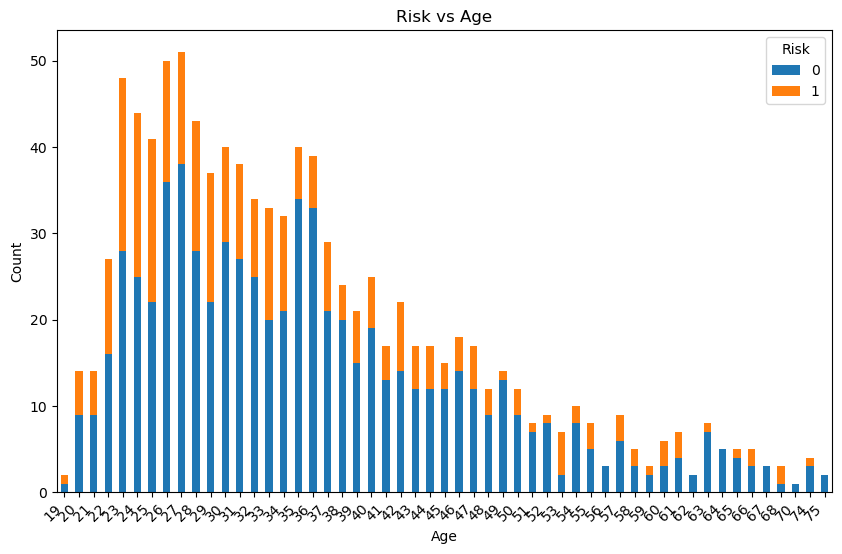

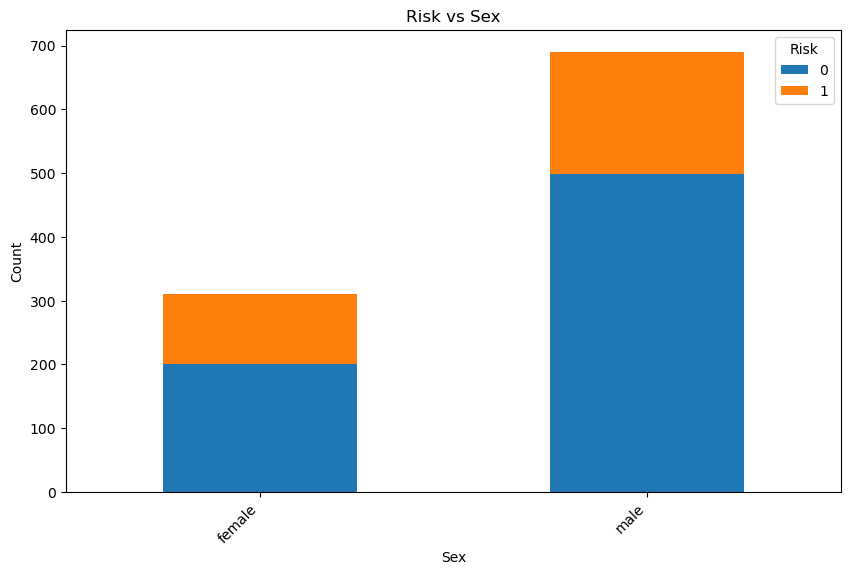

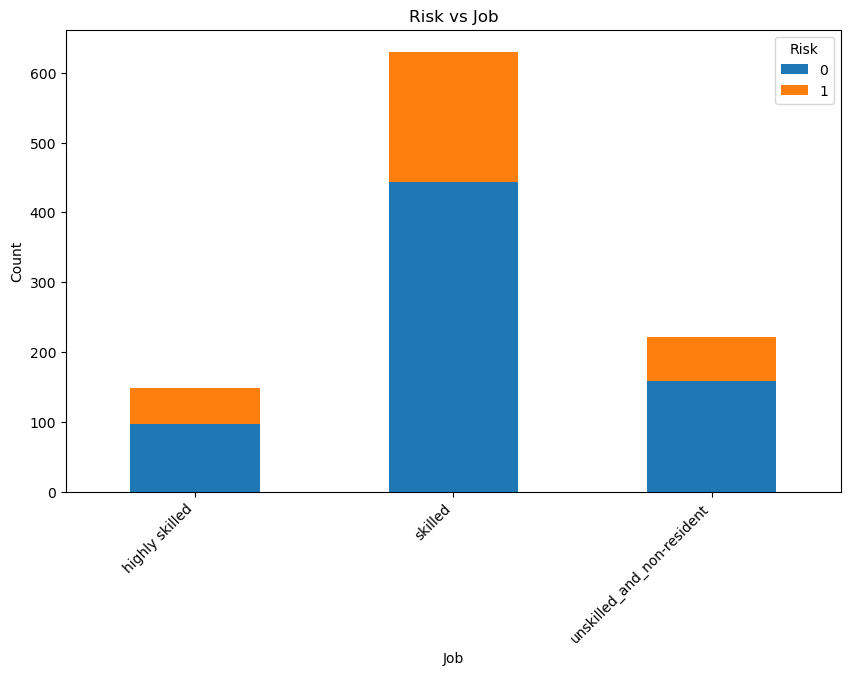

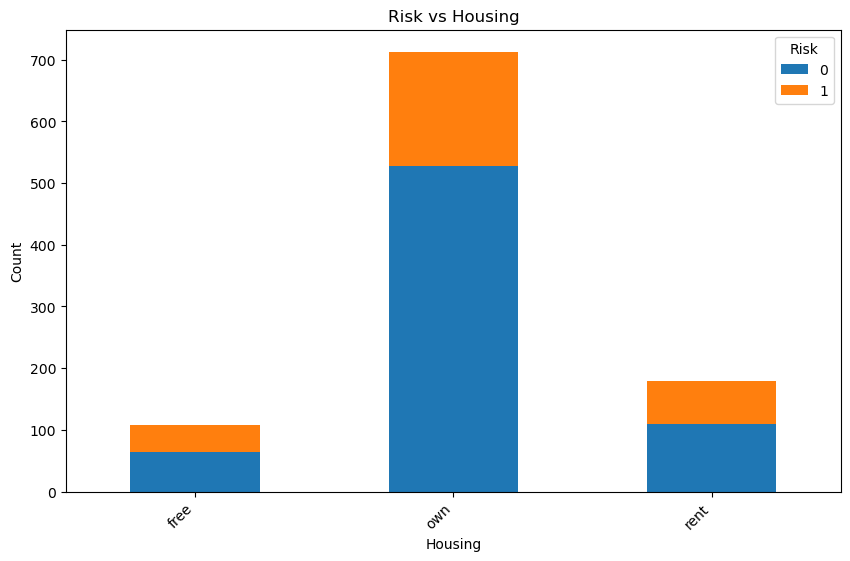

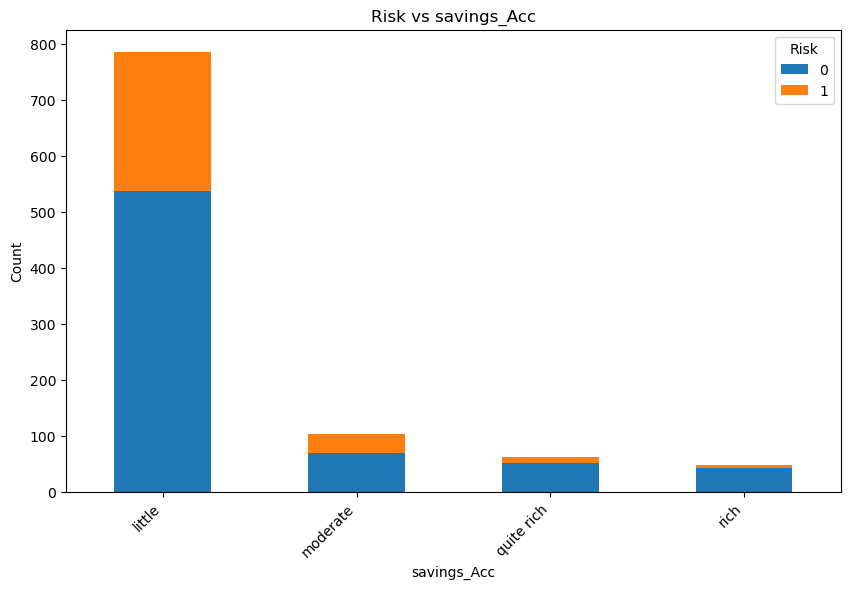

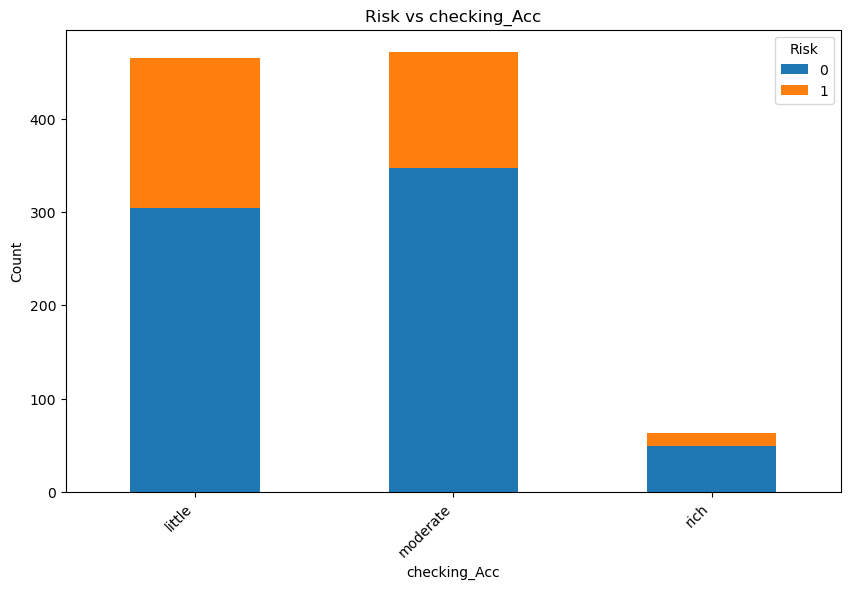

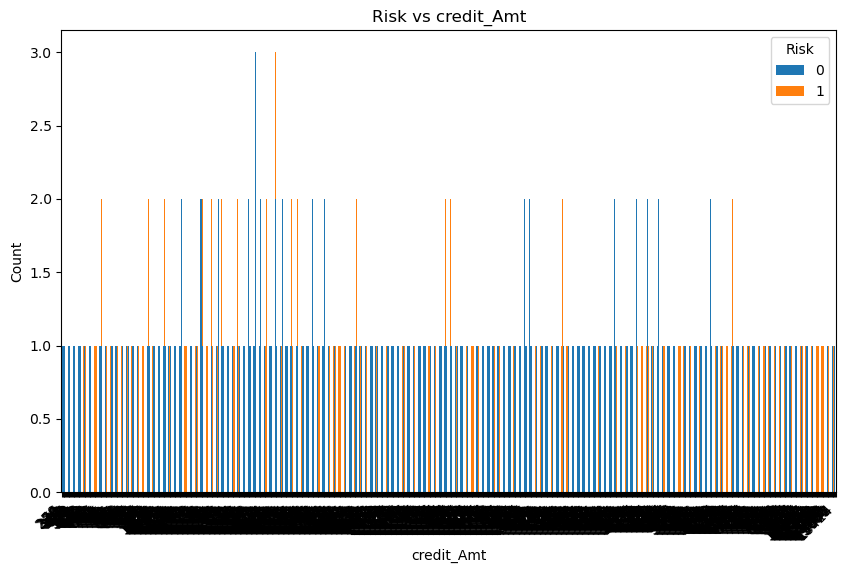

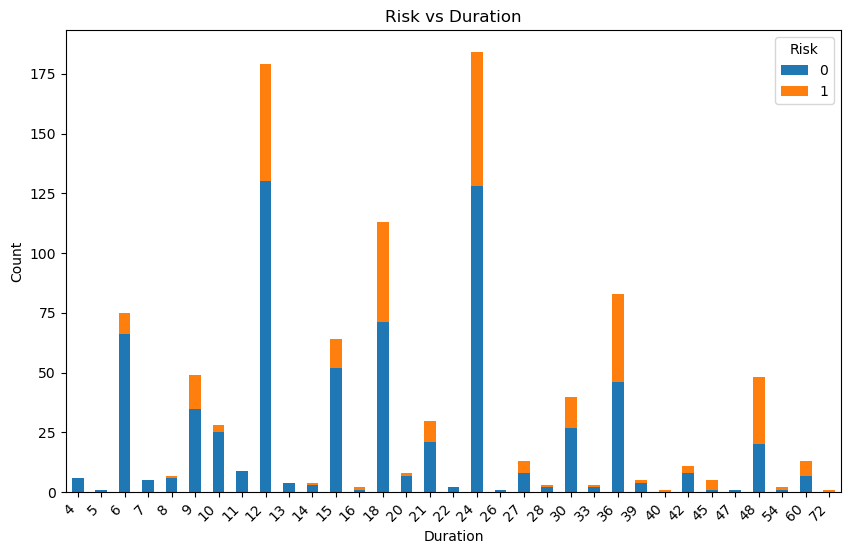

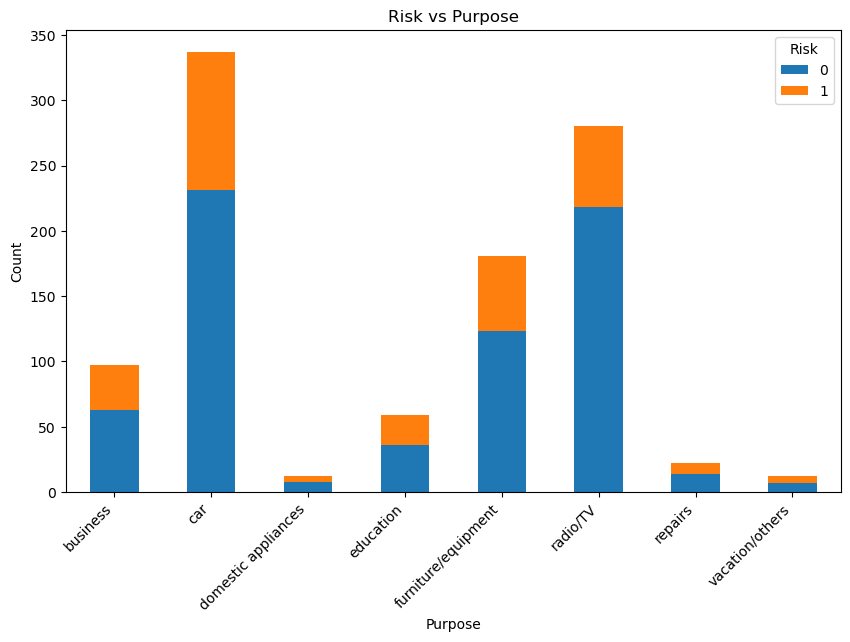

In [31]:
# we will now make charts to see our target variable risk we all other variables
# Set up the figure and axis for plotting
plt.figure(figsize=(10, 6))

# For each categorical variable, we will group by 'Risk' and then plot the stacked bar chart
categories = ['Age', 'Sex', 'Job', 'Housing', 'savings_Acc', 'checking_Acc',
       'credit_Amt', 'Duration', 'Purpose']

for cat in categories:
    # Create a stacked bar chart for each category versus 'Risk'
    risk_counts = pd.crosstab(df[cat], df['Risk'])

    # Plot the stacked bar chart
    risk_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

    # Set chart title and labels
    plt.title(f'Risk vs {cat}')
    plt.xlabel(cat)
    plt.ylabel('Count')

    # Display the plot
    plt.legend(title='Risk')
    plt.xticks(rotation=45, ha='right')
    plt.show()


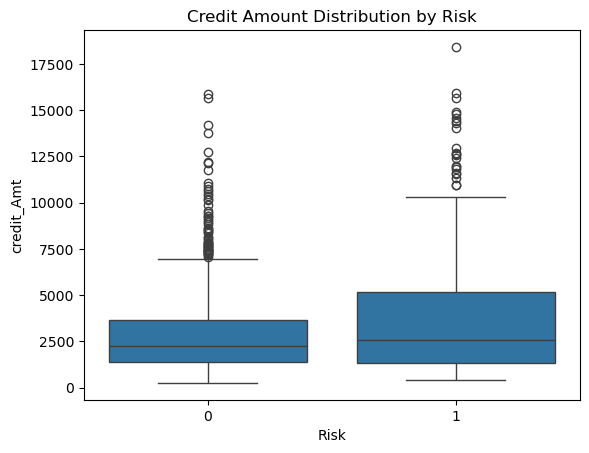

In [33]:
sns.boxplot(x='Risk', y='credit_Amt', data=df)
plt.title('Credit Amount Distribution by Risk')
plt.show()


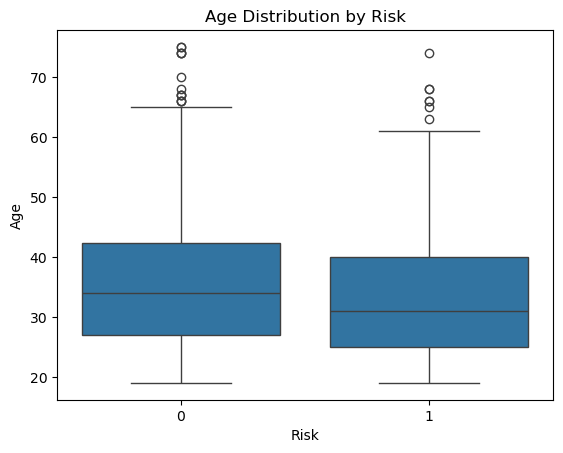

In [34]:
sns.boxplot(x="Risk", y="Age", data=df)
plt.title('Age Distribution by Risk')
plt.show()
hue="survived"

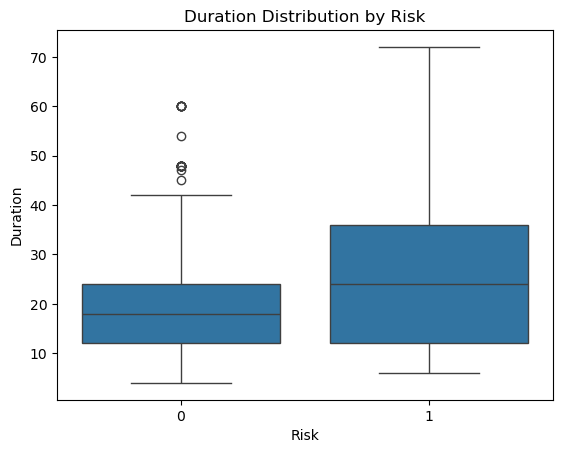

In [35]:
sns.boxplot(x="Risk", y="Duration", data=df)
plt.title('Duration Distribution by Risk')
plt.show()
hue="survived"

* Age: for age its a positive skew and people in take less likely to default after age of 50
* Sex: females are less likely to default
* Job: skilled people get the most amount of loans
* Housing: house owners are more likely to get loans
* savings_Acc: the rich category is less likely to default and little is more likely to default
* checking_Acc: the rich category is less likely to default and little is more likely to default
* credit_Amt: there are outliers present and the more the amount less the risk
* Duration: NO outliers present in this category
* Purpose: the car and radio has the highest loans and also we can see car loans default more than others
* we can say that if the persom has little money and is a man of young age <50 and has rent he is more likely to default 

## **Model Building**

Separate the predictor and target variables and split Data

In [39]:
X = df.drop("Risk", axis=1)
y = df.pop("Risk")

Making dummy variables

Since our predictors are categorical variables, we should make dummy variables to represent each category, and drop one category. Thus if a variable has five categories, we will make one variable (0/1) to represent each category, and then we will drop one category, using only four categories of that variable in the model.

Let us check the categories of each predictor

In [41]:
X.nunique()

Age              53
Sex               2
Job               3
Housing           3
savings_Acc       4
checking_Acc      3
credit_Amt      921
Duration         33
Purpose           8
dtype: int64

In [42]:
# Select only the categorical columns
categorical_columns = X.select_dtypes(include=['object', 'category']).columns

# Create dummy variables only for the categorical columns
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Display a sample of the resulting DataFrame
X.sample(10)


,Age,credit_Amt,Duration,Sex_male,Job_skilled,Job_unskilled_and_non-resident,Housing_own,Housing_rent,savings_Acc_moderate,savings_Acc_quite rich,savings_Acc_rich,checking_Acc_moderate,checking_Acc_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
836,21,886,12,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False
307,33,727,12,True,False,True,True,False,True,False,False,False,False,False,False,False,False,True,False,False
225,27,2613,36,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
195,34,1501,9,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False
63,25,14421,48,True,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False
328,31,4473,36,True,True,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False
645,27,7980,36,True,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False
86,27,1295,18,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False
939,46,6842,24,True,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False
757,39,1271,15,True,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False


Splitting between train and test

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=1
)

Let us confirm that our train and test sets have the same proportion of target variable as in the full data

In [46]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])
print("Number of columns in train data =", y_train.shape[0])
print("Number of columns in test data =", y_test.shape[0])

Number of rows in train data = 750
Number of rows in test data = 250
Number of columns in train data = 750
Number of columns in test data = 250


Build Decision Tree Model¶


We will build our model using the DecisionTreeClassifier function.
Using default 'gini' criteria to split. Other option include 'entropy'.




In [48]:
dTree = DecisionTreeClassifier(criterion="gini", random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

Evaluating our Decision Tree¶

We will define two functions, to calculate evaluation metrics, and to visualize the Confusion Matrix. Though we can get the basic information through other ways, these functions make it easier to see the metrics and the confusion matrix in an easily interpretable way.

In [51]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(model, predictors, target):

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [52]:
# Calculating different metrics
dTree_model_train_perf = model_performance_classification(
    dTree, X_train, y_train
)
print("Training performance:\n", dTree_model_train_perf)
dTree_model_test_perf = model_performance_classification(dTree, X_test, y_test)
print("Testing performance:\n", dTree_model_test_perf)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0     0.624  0.413333   0.382716  0.397436


the training performace is much better than the test so we know the data is overfitted

In [55]:
# function to create Confusion matrix
def create_confusion_matrix(model, predictors, target, figsize=(5, 5)):
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [
        f"{v1}\n{v2}\n{v3}"
        for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
    ]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=labels, fmt="", cmap="Blues")

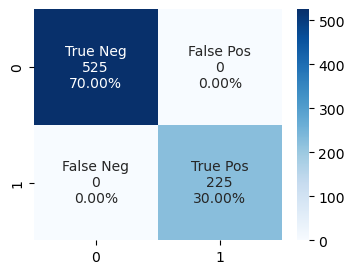

In [56]:
create_confusion_matrix(dTree, X_train, y_train, figsize=(4, 3))

Since the unchecked (full) tree is overfitting,
 we will further improve the model by tuning the hyperparameters to maximize the metric of interest to us

What does the bank want?

The bank wants to predict which customers might be the candidates for a personal loan.
The algorthm can make two types of errors: flagging a customer as a potential no defaulter but in actuality the customer is a defaulter (False Positive). The bank will end up with losses
The other error is that the model labels a customer as "0" (defaulter) but in actualilty the customer would have paid  the loan back  (non defaulter). In this case there will be an opportunity loss.
Which loss is greater ?

Since the bank wants to Context: **To minimize loss from the bank’s perspective**, the bank needs a decision rule regarding whom to approve the loan and whom not to. An applicant’s demographic and socio-economic profiles are considered by loan managers before a decision is taken regarding his/her loan application. i feel like **precision** is more importanat because they are not looking to expand but to minimize losses so we need to reduce false positives
Context:






In [59]:
#Using GridSearch for Hyperparameter tuning of our tree model¶

In [60]:
#Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of the model, so we usually resort to specifying a parameter grid and using Grid search to find the best combination of parameters that optimizes the metric of interest
#we further validate the results by using the cross validation technique and obtain a robust average of best parameters
#The metric chosen to be optimized, (e.g. f1-score or Recall etc.) should be specified during GridSearch

In [61]:
# Choose the type of classifier.
dTree_tuned = DecisionTreeClassifier(criterion='gini', random_state=1)

# Grid of parameters to choose from

parameters = {
    "max_depth": np.arange(1, 7, 1),
    "min_samples_leaf": [1,2,3,4,5,6],
    "max_leaf_nodes": [10,15,20,25,40],
    "min_impurity_decrease": [0.001, 0.01, 0.1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.precision_score)

# Run the grid search
grid_obj = GridSearchCV(dTree_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dTree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dTree_tuned.fit(X_train, y_train)


parameters = {
    "max_depth": np.arange(1, 7, 1),
    "min_samples_leaf": [1,2,3,4,5,6],
    "max_leaf_nodes": [10,15,20,25,40],
    "min_impurity_decrease": [0.001, 0.01, 0.1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.precision_score)

# Run the grid search
grid_obj = GridSearchCV(dTree_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dTree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dTree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.001, min_samples_leaf=4,
                       random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0     0.756  0.226667       0.85  0.357895
Testing performance:
    Accuracy    Recall  Precision        F1
0     0.712  0.146667   0.578947  0.234043


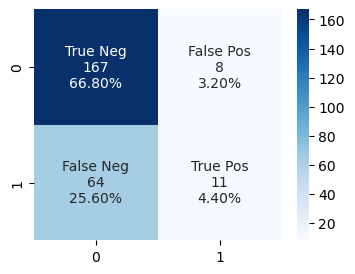

In [62]:
# Calculating different metrics
dTree_tuned_model_train_perf = model_performance_classification(
    dTree_tuned, X_train, y_train
)
print("Training performance:\n", dTree_tuned_model_train_perf)
dTree_tuned_model_test_perf = model_performance_classification(dTree_tuned, X_test, y_test)
print("Testing performance:\n", dTree_tuned_model_test_perf)
# Creating confusion matrix
create_confusion_matrix(dTree_tuned, X_test, y_test, figsize=(4, 3))

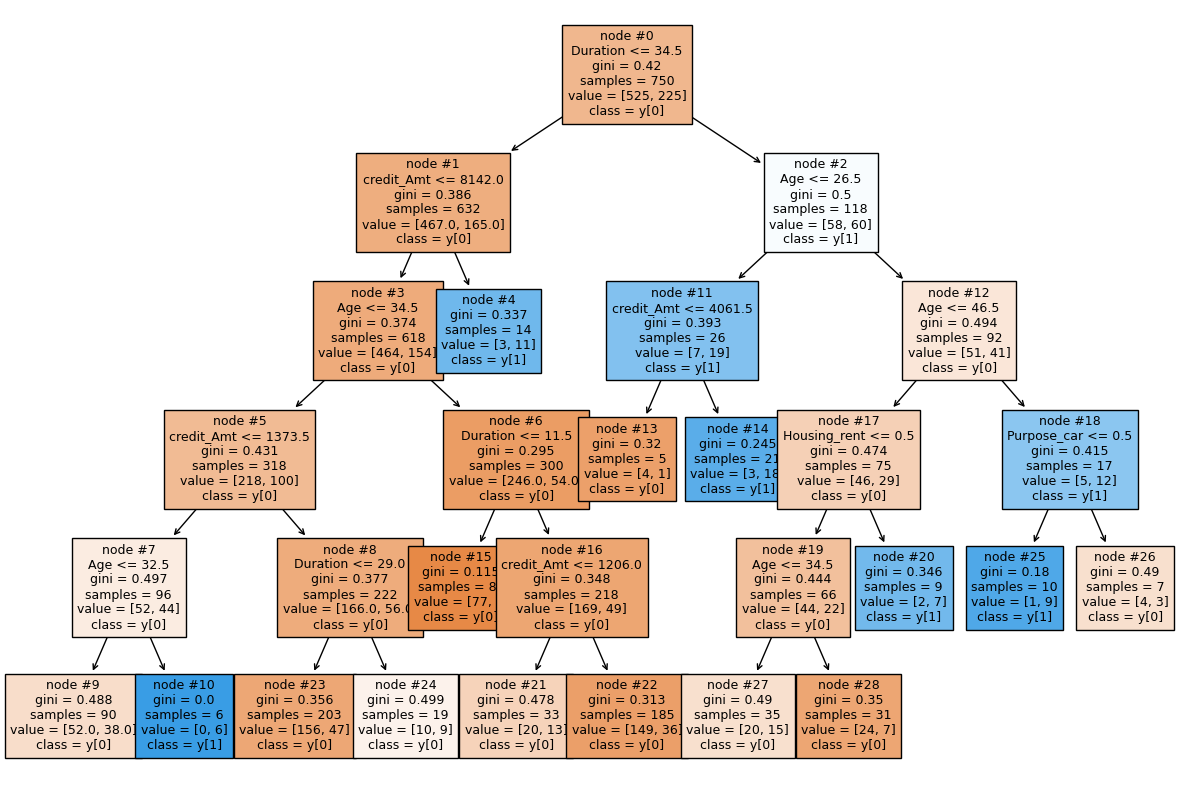

In [63]:
feature_names = X_train.columns
plt.figure(figsize=(15, 10))

tree.plot_tree(
    dTree_tuned,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

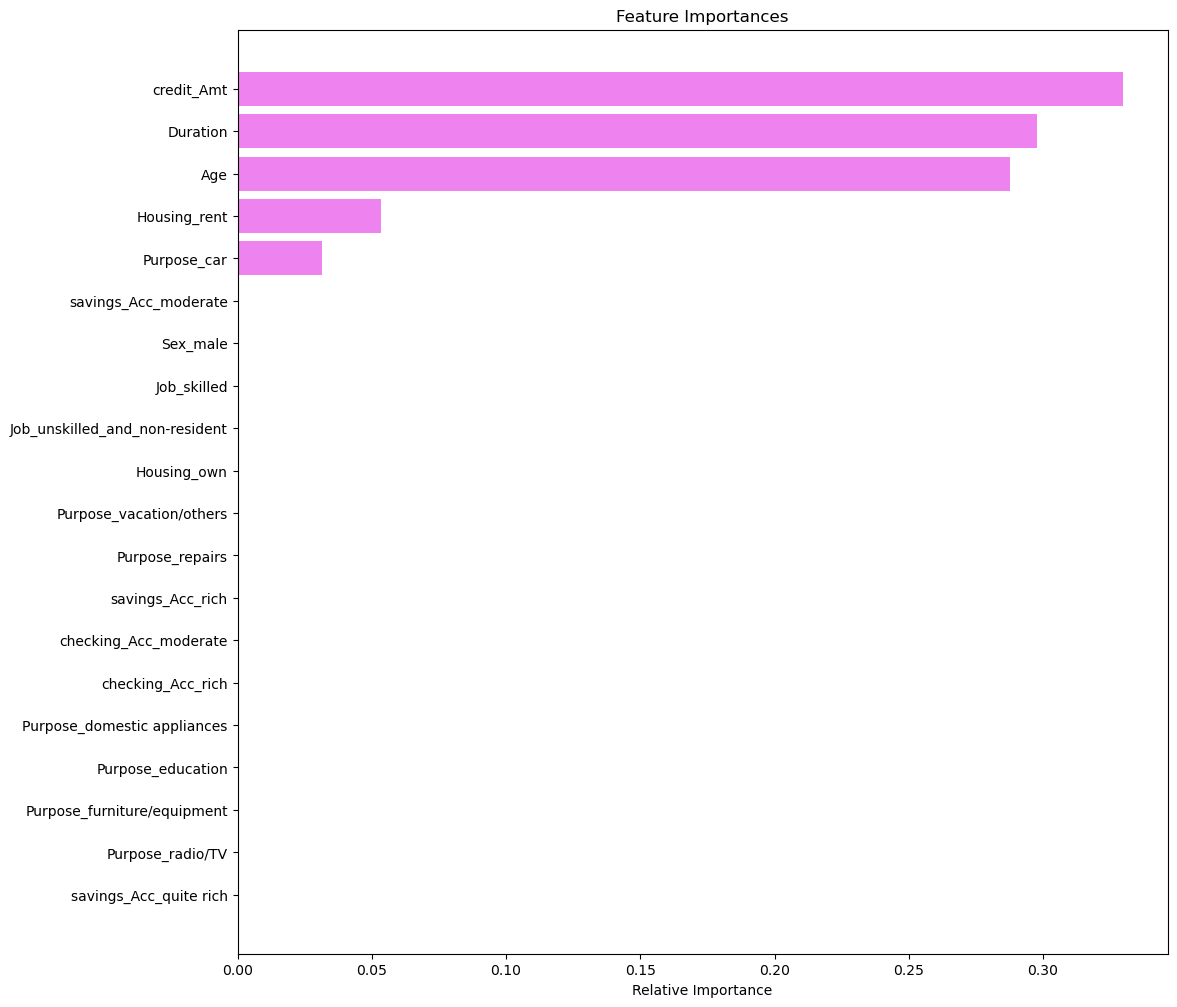

In [64]:
feature_names = X_train.columns
importances = dTree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

According to this credit amount,age , duration and housing size  are the most important features in determining whether a customer will respond positively to the loan offer or not

## Using Bagging Classifier

In [67]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.978667  0.933333   0.995261  0.963303
Testing performance:
    Accuracy    Recall  Precision        F1
0     0.656  0.293333        0.4  0.338462


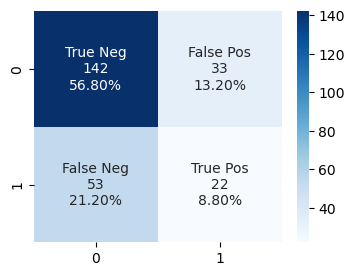

In [68]:
# Fitting the model
bagging_model = BaggingClassifier(random_state=1)
bagging_model.fit(X_train, y_train)

# Calculating different metrics
bagging_model_train_perf = model_performance_classification(
    bagging_model, X_train, y_train
)
print("Training performance:\n", bagging_model_train_perf)

bagging_model_test_perf = model_performance_classification(
    bagging_model, X_test, y_test
)
print("Testing performance:\n", bagging_model_test_perf)

# Creating confusion matrix
create_confusion_matrix(bagging_model, X_test, y_test, figsize=(4, 3))

In [69]:
#Tuning Bagging Classifier model

In [70]:
# Choose the type of classifier.
bagging_model_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.1,0.2,0.3,0.4,0.5],
    "n_estimators": [10, 20, 30, 40, 50, 60, 100],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.precision_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_model_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_model_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_model_tuned.fit(X_train, y_train)

BaggingClassifier(max_samples=0.3, n_estimators=50, random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.857333  0.573333   0.921429  0.706849
Testing performance:
    Accuracy    Recall  Precision        F1
0     0.716  0.346667   0.541667  0.422764


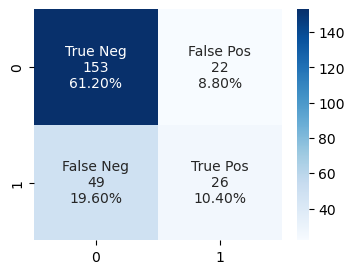

In [71]:
# Calculating different metrics
bagging_model_tuned_train_perf = model_performance_classification(
    bagging_model_tuned, X_train, y_train
)
print("Training performance:\n", bagging_model_tuned_train_perf)
bagging_model_tuned_test_perf = model_performance_classification(
    bagging_model_tuned, X_test, y_test
)
print("Testing performance:\n", bagging_model_tuned_test_perf)

# Creating confusion matrix
create_confusion_matrix(bagging_model_tuned, X_test, y_test, figsize=(4, 3))

# Random Forest Model

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0      0.68  0.253333    0.44186  0.322034


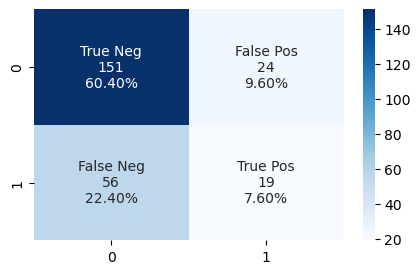

In [73]:
# Fitting the model
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

# Calculating different metrics
rf_model_train_perf = model_performance_classification(rf, X_train, y_train)
print("Training performance:\n", rf_model_train_perf)
rf_model_test_perf = model_performance_classification(rf, X_test, y_test)
print("Testing performance:\n", rf_model_test_perf)

# Creating confusion matrix
create_confusion_matrix(rf, X_test, y_test, figsize=(5, 3))

In [74]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(class_weight={0: 0.40, 1: 0.60}, random_state=1)

# Define the parameter grid.
parameters = {
    "max_depth": list(np.arange(3, 10, 1)),
    "max_features": np.arange(0.5, 0.8, 0.1),
    "max_samples": np.arange(0.8, 1, 0.1),
    "min_samples_split": np.arange(3, 15, 3),
    "n_estimators": np.arange(20, 100, 20),
    "min_impurity_decrease": [0.001, 0.01, 0.1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

# Run the grid search
grid_search = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=2, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Set the classifier to the best combination of parameters
rf_tuned = grid_search.best_estimator_

Fitting 2 folds for each of 2688 candidates, totalling 5376 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_

[CV] END max_depth=3, max_features=0.5, max_samples=0.8, min_impurity_decrease=0.001, min_samples_split=3, n_estimators=60; total time=   0.0s
[CV] END max_depth=3, max_features=0.5, max_samples=0.8, min_impurity_decrease=0.001, min_samples_split=6, n_estimators=80; total time=   0.0s
[CV] END max_depth=3, max_features=0.5, max_samples=0.8, min_impurity_decrease=0.001, min_samples_split=12, n_estimators=20; total time=   0.0s
[CV] END max_depth=3, max_features=0.5, max_samples=0.8, min_impurity_decrease=0.001, min_samples_split=12, n_estimators=80; total time=   0.1s
[CV] END max_depth=3, max_features=0.5, max_samples=0.8, min_impurity_decrease=0.01, min_samples_split=6, n_estimators=40; total time=   0.0s
[CV] END max_depth=3, max_features=0.5, max_samples=0.8, min_impurity_decrease=0.01, min_samples_split=9, n_estimators=60; total time=   0.0s
[CV] END max_depth=3, max_features=0.5, max_samples=0.8, min_impurity_decrease=0.01, min_samples_split=9, n_estimators=60; total time=   0.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_

[CV] END max_depth=3, max_features=0.5, max_samples=0.8, min_impurity_decrease=0.001, min_samples_split=3, n_estimators=20; total time=   0.0s
[CV] END max_depth=3, max_features=0.5, max_samples=0.8, min_impurity_decrease=0.001, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END max_depth=3, max_features=0.5, max_samples=0.8, min_impurity_decrease=0.001, min_samples_split=6, n_estimators=40; total time=   0.0s
[CV] END max_depth=3, max_features=0.5, max_samples=0.8, min_impurity_decrease=0.001, min_samples_split=9, n_estimators=40; total time=   0.0s
[CV] END max_depth=3, max_features=0.5, max_samples=0.8, min_impurity_decrease=0.001, min_samples_split=9, n_estimators=80; total time=   0.1s
[CV] END max_depth=3, max_features=0.5, max_samples=0.8, min_impurity_decrease=0.01, min_samples_split=3, n_estimators=60; total time=   0.1s
[CV] END max_depth=3, max_features=0.5, max_samples=0.8, min_impurity_decrease=0.01, min_samples_split=6, n_estimators=80; total time=   0.1s
[

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_

[CV] END max_depth=4, max_features=0.5, max_samples=0.9, min_impurity_decrease=0.01, min_samples_split=3, n_estimators=60; total time=   0.0s
[CV] END max_depth=4, max_features=0.5, max_samples=0.9, min_impurity_decrease=0.01, min_samples_split=3, n_estimators=80; total time=   0.0s
[CV] END max_depth=4, max_features=0.5, max_samples=0.9, min_impurity_decrease=0.01, min_samples_split=3, n_estimators=80; total time=   0.1s
[CV] END max_depth=4, max_features=0.5, max_samples=0.9, min_impurity_decrease=0.1, min_samples_split=12, n_estimators=20; total time=   0.0s
[CV] END max_depth=4, max_features=0.5, max_samples=0.9, min_impurity_decrease=0.1, min_samples_split=12, n_estimators=20; total time=   0.0s
[CV] END max_depth=4, max_features=0.5, max_samples=0.9, min_impurity_decrease=0.1, min_samples_split=12, n_estimators=40; total time=   0.0s
[CV] END max_depth=4, max_features=0.5, max_samples=0.9, min_impurity_decrease=0.1, min_samples_split=12, n_estimators=40; total time=   0.0s
[CV] E

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_

[CV] END max_depth=4, max_features=0.5, max_samples=0.9, min_impurity_decrease=0.001, min_samples_split=12, n_estimators=60; total time=   0.1s
[CV] END max_depth=4, max_features=0.5, max_samples=0.9, min_impurity_decrease=0.001, min_samples_split=12, n_estimators=60; total time=   0.0s
[CV] END max_depth=4, max_features=0.5, max_samples=0.9, min_impurity_decrease=0.001, min_samples_split=12, n_estimators=80; total time=   0.1s
[CV] END max_depth=4, max_features=0.5, max_samples=0.9, min_impurity_decrease=0.001, min_samples_split=12, n_estimators=80; total time=   0.1s
[CV] END max_depth=4, max_features=0.5, max_samples=0.9, min_impurity_decrease=0.1, min_samples_split=9, n_estimators=20; total time=   0.0s
[CV] END max_depth=4, max_features=0.5, max_samples=0.9, min_impurity_decrease=0.1, min_samples_split=9, n_estimators=20; total time=   0.0s
[CV] END max_depth=4, max_features=0.5, max_samples=0.9, min_impurity_decrease=0.1, min_samples_split=9, n_estimators=40; total time=   0.0s
[

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_

depth=4, max_features=0.5, max_samples=0.9, min_impurity_decrease=0.1, min_samples_split=6, n_estimators=80; total time=   0.0s
[CV] END max_depth=4, max_features=0.6, max_samples=0.8, min_impurity_decrease=0.01, min_samples_split=3, n_estimators=20; total time=   0.0s
[CV] END max_depth=4, max_features=0.6, max_samples=0.8, min_impurity_decrease=0.01, min_samples_split=3, n_estimators=20; total time=   0.0s
[CV] END max_depth=4, max_features=0.6, max_samples=0.8, min_impurity_decrease=0.01, min_samples_split=3, n_estimators=40; total time=   0.0s
[CV] END max_depth=4, max_features=0.6, max_samples=0.8, min_impurity_decrease=0.01, min_samples_split=3, n_estimators=40; total time=   0.0s
[CV] END max_depth=4, max_features=0.6, max_samples=0.8, min_impurity_decrease=0.01, min_samples_split=3, n_estimators=60; total time=   0.0s
[CV] END max_depth=4, max_features=0.6, max_samples=0.8, min_impurity_decrease=0.01, min_samples_split=3, n_estimators=60; total time=   0.0s
[CV] END max_depth=4

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_

[CV] END max_depth=5, max_features=0.6, max_samples=0.8, min_impurity_decrease=0.001, min_samples_split=9, n_estimators=60; total time=   0.0s
[CV] END max_depth=5, max_features=0.6, max_samples=0.8, min_impurity_decrease=0.001, min_samples_split=9, n_estimators=60; total time=   0.0s
[CV] END max_depth=5, max_features=0.6, max_samples=0.8, min_impurity_decrease=0.001, min_samples_split=9, n_estimators=80; total time=   0.1s
[CV] END max_depth=5, max_features=0.6, max_samples=0.8, min_impurity_decrease=0.001, min_samples_split=9, n_estimators=80; total time=   0.1s
[CV] END max_depth=5, max_features=0.6, max_samples=0.8, min_impurity_decrease=0.1, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END max_depth=5, max_features=0.6, max_samples=0.8, min_impurity_decrease=0.1, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END max_depth=5, max_features=0.6, max_samples=0.8, min_impurity_decrease=0.1, min_samples_split=6, n_estimators=40; total time=   0.0s
[CV] 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_

s_split=9, n_estimators=60; total time=   0.0s
[CV] END max_depth=6, max_features=0.5, max_samples=0.9, min_impurity_decrease=0.001, min_samples_split=9, n_estimators=60; total time=   0.0s
[CV] END max_depth=6, max_features=0.5, max_samples=0.9, min_impurity_decrease=0.001, min_samples_split=9, n_estimators=80; total time=   0.1s
[CV] END max_depth=6, max_features=0.5, max_samples=0.9, min_impurity_decrease=0.001, min_samples_split=9, n_estimators=80; total time=   0.1s
[CV] END max_depth=6, max_features=0.5, max_samples=0.9, min_impurity_decrease=0.1, min_samples_split=9, n_estimators=20; total time=   0.0s
[CV] END max_depth=6, max_features=0.5, max_samples=0.9, min_impurity_decrease=0.1, min_samples_split=9, n_estimators=20; total time=   0.0s
[CV] END max_depth=6, max_features=0.5, max_samples=0.9, min_impurity_decrease=0.1, min_samples_split=9, n_estimators=40; total time=   0.0s
[CV] END max_depth=6, max_features=0.5, max_samples=0.9, min_impurity_decrease=0.1, min_samples_split

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_

[CV] END max_depth=5, max_features=0.6, max_samples=0.8, min_impurity_decrease=0.1, min_samples_split=3, n_estimators=80; total time=   0.0s
[CV] END max_depth=5, max_features=0.6, max_samples=0.8, min_impurity_decrease=0.1, min_samples_split=3, n_estimators=80; total time=   0.0s
[CV] END max_depth=5, max_features=0.6, max_samples=0.9, min_impurity_decrease=0.01, min_samples_split=3, n_estimators=20; total time=   0.0s
[CV] END max_depth=5, max_features=0.6, max_samples=0.9, min_impurity_decrease=0.01, min_samples_split=3, n_estimators=20; total time=   0.0s
[CV] END max_depth=5, max_features=0.6, max_samples=0.9, min_impurity_decrease=0.01, min_samples_split=3, n_estimators=40; total time=   0.0s
[CV] END max_depth=5, max_features=0.6, max_samples=0.9, min_impurity_decrease=0.01, min_samples_split=3, n_estimators=40; total time=   0.0s
[CV] END max_depth=5, max_features=0.6, max_samples=0.9, min_impurity_decrease=0.01, min_samples_split=3, n_estimators=60; total time=   0.0s
[CV] END

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_

[CV] END max_depth=6, max_features=0.6, max_samples=0.9, min_impurity_decrease=0.01, min_samples_split=3, n_estimators=60; total time=   0.1s
[CV] END max_depth=6, max_features=0.6, max_samples=0.9, min_impurity_decrease=0.01, min_samples_split=3, n_estimators=60; total time=   0.0s
[CV] END max_depth=6, max_features=0.6, max_samples=0.9, min_impurity_decrease=0.01, min_samples_split=3, n_estimators=80; total time=   0.0s
[CV] END max_depth=6, max_features=0.6, max_samples=0.9, min_impurity_decrease=0.01, min_samples_split=3, n_estimators=80; total time=   0.1s
[CV] END max_depth=6, max_features=0.7, max_samples=0.8, min_impurity_decrease=0.001, min_samples_split=3, n_estimators=20; total time=   0.0s
[CV] END max_depth=6, max_features=0.7, max_samples=0.8, min_impurity_decrease=0.001, min_samples_split=3, n_estimators=20; total time=   0.0s
[CV] END max_depth=6, max_features=0.7, max_samples=0.8, min_impurity_decrease=0.001, min_samples_split=3, n_estimators=40; total time=   0.0s
[CV

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_

[CV] END max_depth=6, max_features=0.7, max_samples=0.8, min_impurity_decrease=0.001, min_samples_split=6, n_estimators=80; total time=   0.1s
[CV] END max_depth=6, max_features=0.7, max_samples=0.8, min_impurity_decrease=0.001, min_samples_split=6, n_estimators=80; total time=   0.1s
[CV] END max_depth=6, max_features=0.7, max_samples=0.8, min_impurity_decrease=0.1, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END max_depth=6, max_features=0.7, max_samples=0.8, min_impurity_decrease=0.1, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END max_depth=6, max_features=0.7, max_samples=0.8, min_impurity_decrease=0.1, min_samples_split=6, n_estimators=40; total time=   0.0s
[CV] END max_depth=6, max_features=0.7, max_samples=0.8, min_impurity_decrease=0.1, min_samples_split=6, n_estimators=40; total time=   0.0s
[CV] END max_depth=6, max_features=0.7, max_samples=0.8, min_impurity_decrease=0.1, min_samples_split=6, n_estimators=60; total time=   0.0s
[CV] END 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_

[CV] END max_depth=6, max_features=0.7, max_samples=0.8, min_impurity_decrease=0.001, min_samples_split=12, n_estimators=60; total time=   0.1s
[CV] END max_depth=6, max_features=0.7, max_samples=0.8, min_impurity_decrease=0.001, min_samples_split=12, n_estimators=80; total time=   0.1s
[CV] END max_depth=6, max_features=0.7, max_samples=0.8, min_impurity_decrease=0.001, min_samples_split=12, n_estimators=80; total time=   0.1s
[CV] END max_depth=6, max_features=0.7, max_samples=0.8, min_impurity_decrease=0.1, min_samples_split=12, n_estimators=20; total time=   0.0s
[CV] END max_depth=6, max_features=0.7, max_samples=0.8, min_impurity_decrease=0.1, min_samples_split=12, n_estimators=20; total time=   0.0s
[CV] END max_depth=6, max_features=0.7, max_samples=0.8, min_impurity_decrease=0.1, min_samples_split=12, n_estimators=40; total time=   0.0s
[CV] END max_depth=6, max_features=0.7, max_samples=0.8, min_impurity_decrease=0.1, min_samples_split=12, n_estimators=40; total time=   0.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END max_depth=6, max_features=0.6, max_samples=0.9, min_impurity_decrease=0.1, min_samples_split=9, n_estimators=80; total time=   0.1s
[CV] END max_depth=6, max_features=0.6, max_samples=0.9, min_impurity_decrease=0.1, min_samples_split=9, n_estimators=80; total time=   0.0s
[CV] END max_depth=6, max_features=0.7, max_samples=0.8, min_impurity_decrease=0.01, min_samples_split=12, n_estimators=20; total time=   0.0s
[CV] END max_depth=6, max_features=0.7, max_samples=0.8, min_impurity_decrease=0.01, min_samples_split=12, n_estimators=20; total time=   0.0s
[CV] END max_depth=6, max_features=0.7, max_samples=0.8, min_impurity_decrease=0.01, min_samples_split=12, n_estimators=40; total time=   0.0s
[CV] END max_depth=6, max_features=0.7, max_samples=0.8, min_impurity_decrease=0.01, min_samples_split=12, n_estimators=40; total time=   0.0s
[CV] END max_depth=6, max_features=0.7, max_samples=0.8, min_impurity_decrease=0.01, min_samples_split=12, n_estimators=60; total time=   0.0s
[CV

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_

[CV] END max_depth=7, max_features=0.7, max_samples=0.8, min_impurity_decrease=0.1, min_samples_split=6, n_estimators=80; total time=   0.1s
[CV] END max_depth=7, max_features=0.7, max_samples=0.8, min_impurity_decrease=0.1, min_samples_split=6, n_estimators=80; total time=   0.0s
[CV] END max_depth=7, max_features=0.7, max_samples=0.9, min_impurity_decrease=0.01, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END max_depth=7, max_features=0.7, max_samples=0.9, min_impurity_decrease=0.01, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END max_depth=7, max_features=0.7, max_samples=0.9, min_impurity_decrease=0.01, min_samples_split=6, n_estimators=40; total time=   0.0s
[CV] END max_depth=7, max_features=0.7, max_samples=0.9, min_impurity_decrease=0.01, min_samples_split=6, n_estimators=40; total time=   0.0s
[CV] END max_depth=7, max_features=0.7, max_samples=0.9, min_impurity_decrease=0.01, min_samples_split=6, n_estimators=60; total time=   0.1s
[CV] END

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_

[CV] END max_depth=7, max_features=0.7, max_samples=0.9, min_impurity_decrease=0.001, min_samples_split=12, n_estimators=40; total time=   0.0s
[CV] END max_depth=7, max_features=0.7, max_samples=0.9, min_impurity_decrease=0.001, min_samples_split=12, n_estimators=60; total time=   0.0s
[CV] END max_depth=7, max_features=0.7, max_samples=0.9, min_impurity_decrease=0.001, min_samples_split=12, n_estimators=60; total time=   0.1s
[CV] END max_depth=7, max_features=0.7, max_samples=0.9, min_impurity_decrease=0.001, min_samples_split=12, n_estimators=80; total time=   0.1s
[CV] END max_depth=7, max_features=0.7, max_samples=0.9, min_impurity_decrease=0.001, min_samples_split=12, n_estimators=80; total time=   0.1s
[CV] END max_depth=7, max_features=0.7, max_samples=0.9, min_impurity_decrease=0.1, min_samples_split=12, n_estimators=20; total time=   0.0s
[CV] END max_depth=7, max_features=0.7, max_samples=0.9, min_impurity_decrease=0.1, min_samples_split=12, n_estimators=20; total time=   0

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_

[CV] END max_depth=7, max_features=0.7999999999999999, max_samples=0.8, min_impurity_decrease=0.001, min_samples_split=3, n_estimators=60; total time=   0.0s
[CV] END max_depth=7, max_features=0.7999999999999999, max_samples=0.8, min_impurity_decrease=0.001, min_samples_split=3, n_estimators=80; total time=   0.1s
[CV] END max_depth=7, max_features=0.7999999999999999, max_samples=0.8, min_impurity_decrease=0.001, min_samples_split=3, n_estimators=80; total time=   0.1s
[CV] END max_depth=7, max_features=0.7999999999999999, max_samples=0.8, min_impurity_decrease=0.1, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END max_depth=7, max_features=0.7999999999999999, max_samples=0.8, min_impurity_decrease=0.1, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END max_depth=7, max_features=0.7999999999999999, max_samples=0.8, min_impurity_decrease=0.1, min_samples_split=6, n_estimators=40; total time=   0.0s
[CV] END max_depth=7, max_features=0.7999999999999999, max

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_

Best parameters found:  {'max_depth': 9, 'max_features': 0.5, 'max_samples': 0.8, 'min_impurity_decrease': 0.001, 'min_samples_split': 3, 'n_estimators': 20}


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_

Training performance:
    Accuracy    Recall  Precision        F1
0  0.898667  0.711111   0.935673  0.808081
Testing performance:
    Accuracy  Recall  Precision        F1
0     0.696    0.32   0.489796  0.387097


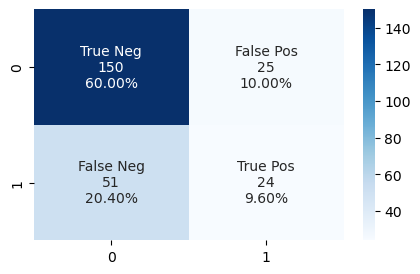

In [75]:
# Calculating different metrics
rf_tuned_model_train_perf = model_performance_classification(rf_tuned, X_train, y_train)
print("Training performance:\n", rf_tuned_model_train_perf)
rf_tuned_model_test_perf = model_performance_classification(rf_tuned, X_test, y_test)
print("Testing performance:\n", rf_tuned_model_test_perf)

# Creating confusion matrix
create_confusion_matrix(rf_tuned, X_test, y_test, figsize=(5, 3))

Random forest is also overfitting and recall is low

We should try to improve the models by tuning the Hyperparameters

In [77]:
# Choose the type of classifier.using more weigths changing the parameters 
rf_tuned1 = RandomForestClassifier(class_weight={0: 0.30, 1: 0.70}, random_state=1)

# Define the parameter grid.
parameters = {
    "max_depth": list(np.arange(3,7, 1)),
    "max_features": np.arange(0.5, 0.8, 0.1),
    "max_samples": np.arange(0.7, 1, 0.1),
    "min_samples_split": np.arange(5, 10, 3),
    "n_estimators": np.arange(50, 200, 50),
    "min_impurity_decrease": [0.001, 0.01, 0.1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

# Run the grid search
grid_search = GridSearchCV(rf_tuned1, parameters, scoring=scorer, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Set the classifier to the best combination of parameters
rf_tuned1 = grid_search.best_estimator_

Fitting 3 folds for each of 1152 candidates, totalling 3456 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_

[CV] END max_depth=8, max_features=0.7, max_samples=0.9, min_impurity_decrease=0.1, min_samples_split=9, n_estimators=80; total time=   0.1s
[CV] END max_depth=8, max_features=0.7, max_samples=0.9, min_impurity_decrease=0.1, min_samples_split=9, n_estimators=80; total time=   0.1s
[CV] END max_depth=8, max_features=0.7999999999999999, max_samples=0.8, min_impurity_decrease=0.01, min_samples_split=12, n_estimators=20; total time=   0.0s
[CV] END max_depth=8, max_features=0.7999999999999999, max_samples=0.8, min_impurity_decrease=0.01, min_samples_split=12, n_estimators=20; total time=   0.0s
[CV] END max_depth=8, max_features=0.7999999999999999, max_samples=0.8, min_impurity_decrease=0.01, min_samples_split=12, n_estimators=40; total time=   0.0s
[CV] END max_depth=8, max_features=0.7999999999999999, max_samples=0.8, min_impurity_decrease=0.01, min_samples_split=12, n_estimators=40; total time=   0.1s
[CV] END max_depth=8, max_features=0.7999999999999999, max_samples=0.8, min_impurity_d

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


_estimators=40; total time=   0.0s
[CV] END max_depth=8, max_features=0.7999999999999999, max_samples=0.8, min_impurity_decrease=0.01, min_samples_split=6, n_estimators=40; total time=   0.0s
[CV] END max_depth=8, max_features=0.7999999999999999, max_samples=0.8, min_impurity_decrease=0.01, min_samples_split=6, n_estimators=60; total time=   0.1s
[CV] END max_depth=8, max_features=0.7999999999999999, max_samples=0.8, min_impurity_decrease=0.01, min_samples_split=6, n_estimators=60; total time=   0.1s
[CV] END max_depth=8, max_features=0.7999999999999999, max_samples=0.8, min_impurity_decrease=0.01, min_samples_split=6, n_estimators=80; total time=   0.1s
[CV] END max_depth=8, max_features=0.7999999999999999, max_samples=0.8, min_impurity_decrease=0.01, min_samples_split=6, n_estimators=80; total time=   0.1s
[CV] END max_depth=8, max_features=0.7999999999999999, max_samples=0.9, min_impurity_decrease=0.001, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END max_depth=8, 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_

[CV] END max_depth=8, max_features=0.7999999999999999, max_samples=0.8, min_impurity_decrease=0.1, min_samples_split=9, n_estimators=40; total time=   0.0s
[CV] END max_depth=8, max_features=0.7999999999999999, max_samples=0.8, min_impurity_decrease=0.1, min_samples_split=9, n_estimators=40; total time=   0.0s
[CV] END max_depth=8, max_features=0.7999999999999999, max_samples=0.8, min_impurity_decrease=0.1, min_samples_split=9, n_estimators=60; total time=   0.0s
[CV] END max_depth=8, max_features=0.7999999999999999, max_samples=0.8, min_impurity_decrease=0.1, min_samples_split=9, n_estimators=60; total time=   0.0s
[CV] END max_depth=8, max_features=0.7999999999999999, max_samples=0.8, min_impurity_decrease=0.1, min_samples_split=9, n_estimators=80; total time=   0.1s
[CV] END max_depth=8, max_features=0.7999999999999999, max_samples=0.8, min_impurity_decrease=0.1, min_samples_split=9, n_estimators=80; total time=   0.0s
[CV] END max_depth=8, max_features=0.7999999999999999, max_sampl

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_

[CV] END max_depth=8, max_features=0.7999999999999999, max_samples=0.8, min_impurity_decrease=0.1, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END max_depth=8, max_features=0.7999999999999999, max_samples=0.8, min_impurity_decrease=0.1, min_samples_split=6, n_estimators=40; total time=   0.0s
[CV] END max_depth=8, max_features=0.7999999999999999, max_samples=0.8, min_impurity_decrease=0.1, min_samples_split=6, n_estimators=40; total time=   0.0s
[CV] END max_depth=8, max_features=0.7999999999999999, max_samples=0.8, min_impurity_decrease=0.1, min_samples_split=6, n_estimators=60; total time=   0.0s
[CV] END max_depth=8, max_features=0.7999999999999999, max_samples=0.8, min_impurity_decrease=0.1, min_samples_split=6, n_estimators=60; total time=   0.0s
[CV] END max_depth=8, max_features=0.7999999999999999, max_samples=0.8, min_impurity_decrease=0.1, min_samples_split=6, n_estimators=80; total time=   0.1s
[CV] END max_depth=8, max_features=0.7999999999999999, max_sampl

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END max_depth=8, max_features=0.7999999999999999, max_samples=0.9, min_impurity_decrease=0.01, min_samples_split=12, n_estimators=40; total time=   0.0s
[CV] END max_depth=8, max_features=0.7999999999999999, max_samples=0.9, min_impurity_decrease=0.01, min_samples_split=12, n_estimators=60; total time=   0.0s
[CV] END max_depth=8, max_features=0.7999999999999999, max_samples=0.9, min_impurity_decrease=0.01, min_samples_split=12, n_estimators=60; total time=   0.0s
[CV] END max_depth=8, max_features=0.7999999999999999, max_samples=0.9, min_impurity_decrease=0.01, min_samples_split=12, n_estimators=80; total time=   0.1s
[CV] END max_depth=8, max_features=0.7999999999999999, max_samples=0.9, min_impurity_decrease=0.01, min_samples_split=12, n_estimators=80; total time=   0.1s
[CV] END max_depth=9, max_features=0.5, max_samples=0.8, min_impurity_decrease=0.001, min_samples_split=12, n_estimators=20; total time=   0.0s
[CV] END max_depth=9, max_features=0.5, max_samples=0.8, min_impur

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_

timators=60; total time=   0.1s
[CV] END max_depth=9, max_features=0.5, max_samples=0.9, min_impurity_decrease=0.001, min_samples_split=3, n_estimators=80; total time=   0.1s
[CV] END max_depth=9, max_features=0.5, max_samples=0.9, min_impurity_decrease=0.001, min_samples_split=3, n_estimators=80; total time=   0.1s
[CV] END max_depth=9, max_features=0.5, max_samples=0.9, min_impurity_decrease=0.1, min_samples_split=3, n_estimators=20; total time=   0.0s
[CV] END max_depth=9, max_features=0.5, max_samples=0.9, min_impurity_decrease=0.1, min_samples_split=3, n_estimators=20; total time=   0.0s
[CV] END max_depth=9, max_features=0.5, max_samples=0.9, min_impurity_decrease=0.1, min_samples_split=3, n_estimators=40; total time=   0.0s
[CV] END max_depth=9, max_features=0.5, max_samples=0.9, min_impurity_decrease=0.1, min_samples_split=3, n_estimators=40; total time=   0.0s
[CV] END max_depth=9, max_features=0.5, max_samples=0.9, min_impurity_decrease=0.1, min_samples_split=3, n_estimators=

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_

[CV] END max_depth=9, max_features=0.7999999999999999, max_samples=0.9, min_impurity_decrease=0.01, min_samples_split=12, n_estimators=20; total time=   0.0s
[CV] END max_depth=9, max_features=0.7999999999999999, max_samples=0.9, min_impurity_decrease=0.01, min_samples_split=12, n_estimators=20; total time=   0.0s
[CV] END max_depth=9, max_features=0.7999999999999999, max_samples=0.9, min_impurity_decrease=0.01, min_samples_split=12, n_estimators=60; total time=   0.1s
[CV] END max_depth=9, max_features=0.7999999999999999, max_samples=0.9, min_impurity_decrease=0.1, min_samples_split=3, n_estimators=40; total time=   0.0s
[CV] END max_depth=9, max_features=0.7999999999999999, max_samples=0.9, min_impurity_decrease=0.1, min_samples_split=6, n_estimators=40; total time=   0.0s
[CV] END max_depth=9, max_features=0.7999999999999999, max_samples=0.9, min_impurity_decrease=0.1, min_samples_split=6, n_estimators=80; total time=   0.0s
[CV] END max_depth=9, max_features=0.7999999999999999, max

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_

[CV] END max_depth=9, max_features=0.7999999999999999, max_samples=0.9, min_impurity_decrease=0.001, min_samples_split=9, n_estimators=40; total time=   0.0s
[CV] END max_depth=9, max_features=0.7999999999999999, max_samples=0.9, min_impurity_decrease=0.001, min_samples_split=9, n_estimators=60; total time=   0.1s
[CV] END max_depth=9, max_features=0.7999999999999999, max_samples=0.9, min_impurity_decrease=0.001, min_samples_split=9, n_estimators=60; total time=   0.1s
[CV] END max_depth=9, max_features=0.7999999999999999, max_samples=0.9, min_impurity_decrease=0.001, min_samples_split=9, n_estimators=80; total time=   0.1s
[CV] END max_depth=9, max_features=0.7999999999999999, max_samples=0.9, min_impurity_decrease=0.001, min_samples_split=9, n_estimators=80; total time=   0.1s
[CV] END max_depth=9, max_features=0.7999999999999999, max_samples=0.9, min_impurity_decrease=0.1, min_samples_split=3, n_estimators=60; total time=   0.0s
[CV] END max_depth=9, max_features=0.7999999999999999,

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_

.1s
[CV] END max_depth=3, max_features=0.7999999999999999, max_samples=0.7999999999999999, min_impurity_decrease=0.1, min_samples_split=5, n_estimators=150; total time=   0.1s
[CV] END max_depth=3, max_features=0.7999999999999999, max_samples=0.7999999999999999, min_impurity_decrease=0.1, min_samples_split=5, n_estimators=150; total time=   0.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_

[CV] END max_depth=9, max_features=0.7999999999999999, max_samples=0.9, min_impurity_decrease=0.001, min_samples_split=12, n_estimators=40; total time=   0.0s
[CV] END max_depth=9, max_features=0.7999999999999999, max_samples=0.9, min_impurity_decrease=0.001, min_samples_split=12, n_estimators=60; total time=   0.1s
[CV] END max_depth=9, max_features=0.7999999999999999, max_samples=0.9, min_impurity_decrease=0.001, min_samples_split=12, n_estimators=60; total time=   0.0s
[CV] END max_depth=9, max_features=0.7999999999999999, max_samples=0.9, min_impurity_decrease=0.001, min_samples_split=12, n_estimators=80; total time=   0.0s
[CV] END max_depth=9, max_features=0.7999999999999999, max_samples=0.9, min_impurity_decrease=0.001, min_samples_split=12, n_estimators=80; total time=   0.1s
[CV] END max_depth=9, max_features=0.7999999999999999, max_samples=0.9, min_impurity_decrease=0.01, min_samples_split=12, n_estimators=40; total time=   0.0s
[CV] END max_depth=9, max_features=0.7999999999

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_

[CV] END max_depth=9, max_features=0.7999999999999999, max_samples=0.9, min_impurity_decrease=0.1, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END max_depth=9, max_features=0.7999999999999999, max_samples=0.9, min_impurity_decrease=0.1, min_samples_split=6, n_estimators=60; total time=   0.0s
[CV] END max_depth=9, max_features=0.7999999999999999, max_samples=0.9, min_impurity_decrease=0.1, min_samples_split=9, n_estimators=60; total time=   0.0s
[CV] END max_depth=9, max_features=0.7999999999999999, max_samples=0.9, min_impurity_decrease=0.1, min_samples_split=12, n_estimators=80; total time=   0.0s
[CV] END max_depth=3, max_features=0.5, max_samples=0.7, min_impurity_decrease=0.001, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=3, max_features=0.5, max_samples=0.7, min_impurity_decrease=0.001, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=3, max_features=0.5, max_samples=0.7, min_impurity_decrease=0.001, min

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_

[CV] END max_depth=9, max_features=0.7999999999999999, max_samples=0.9, min_impurity_decrease=0.01, min_samples_split=9, n_estimators=60; total time=   0.1s
[CV] END max_depth=9, max_features=0.7999999999999999, max_samples=0.9, min_impurity_decrease=0.01, min_samples_split=9, n_estimators=80; total time=   0.1s
[CV] END max_depth=9, max_features=0.7999999999999999, max_samples=0.9, min_impurity_decrease=0.01, min_samples_split=12, n_estimators=40; total time=   0.0s
[CV] END max_depth=9, max_features=0.7999999999999999, max_samples=0.9, min_impurity_decrease=0.01, min_samples_split=12, n_estimators=80; total time=   0.1s
[CV] END max_depth=9, max_features=0.7999999999999999, max_samples=0.9, min_impurity_decrease=0.1, min_samples_split=3, n_estimators=80; total time=   0.0s
[CV] END max_depth=9, max_features=0.7999999999999999, max_samples=0.9, min_impurity_decrease=0.1, min_samples_split=9, n_estimators=40; total time=   0.0s
[CV] END max_depth=9, max_features=0.7999999999999999, max

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END max_depth=3, max_features=0.5, max_samples=0.7, min_impurity_decrease=0.1, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, max_features=0.5, max_samples=0.7, min_impurity_decrease=0.1, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, max_features=0.5, max_samples=0.7999999999999999, min_impurity_decrease=0.001, min_samples_split=5, n_estimators=150; total time=   0.1s
[CV] END max_depth=3, max_features=0.5, max_samples=0.7999999999999999, min_impurity_decrease=0.001, min_samples_split=5, n_estimators=150; total time=   0.1s
[CV] END max_depth=3, max_features=0.5, max_samples=0.7999999999999999, min_impurity_decrease=0.001, min_samples_split=5, n_estimators=150; total time=   0.1s
[CV] END max_depth=3, max_features=0.5, max_samples=0.7999999999999999, min_impurity_decrease=0.001, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, max_features=0.5, max_samples=0.7999999999999999, min_impurit

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_

[CV] END max_depth=3, max_features=0.7999999999999999, max_samples=0.7999999999999999, min_impurity_decrease=0.001, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, max_features=0.7999999999999999, max_samples=0.7999999999999999, min_impurity_decrease=0.1, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, max_features=0.7999999999999999, max_samples=0.7999999999999999, min_impurity_decrease=0.1, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, max_features=0.7999999999999999, max_samples=0.7999999999999999, min_impurity_decrease=0.1, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=3, max_features=0.7999999999999999, max_samples=0.7999999999999999, min_impurity_decrease=0.1, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=3, max_features=0.7999999999999999, max_samples=0.8999999999999999, min_impurity_decrease=0.001, min_samples_split=8, n_es

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_

[CV] END max_depth=3, max_features=0.7999999999999999, max_samples=0.7999999999999999, min_impurity_decrease=0.1, min_samples_split=8, n_estimators=150; total time=   0.1s
[CV] END max_depth=3, max_features=0.7999999999999999, max_samples=0.8999999999999999, min_impurity_decrease=0.1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, max_features=0.7999999999999999, max_samples=0.8999999999999999, min_impurity_decrease=0.1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, max_features=0.7999999999999999, max_samples=0.8999999999999999, min_impurity_decrease=0.1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, max_features=0.7999999999999999, max_samples=0.8999999999999999, min_impurity_decrease=0.1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=3, max_features=0.7999999999999999, max_samples=0.9999999999999999, min_impurity_decrease=0.001, min_samples_split=5, n_esti

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_

[CV] END max_depth=3, max_features=0.7999999999999999, max_samples=0.8999999999999999, min_impurity_decrease=0.001, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=3, max_features=0.7999999999999999, max_samples=0.8999999999999999, min_impurity_decrease=0.01, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, max_features=0.7999999999999999, max_samples=0.8999999999999999, min_impurity_decrease=0.01, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=3, max_features=0.7999999999999999, max_samples=0.8999999999999999, min_impurity_decrease=0.01, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=3, max_features=0.7999999999999999, max_samples=0.8999999999999999, min_impurity_decrease=0.01, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=3, max_features=0.7999999999999999, max_samples=0.8999999999999999, min_impurity_decrease=0.1, min_samples_split=8, n

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_

e=0.001, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=4, max_features=0.5, max_samples=0.7999999999999999, min_impurity_decrease=0.01, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=4, max_features=0.5, max_samples=0.7999999999999999, min_impurity_decrease=0.01, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=4, max_features=0.5, max_samples=0.7999999999999999, min_impurity_decrease=0.01, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=4, max_features=0.5, max_samples=0.7999999999999999, min_impurity_decrease=0.01, min_samples_split=8, n_estimators=150; total time=   0.1s
[CV] END max_depth=4, max_features=0.5, max_samples=0.8999999999999999, min_impurity_decrease=0.001, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=4, max_features=0.5, max_samples=0.8999999999999999, min_impurity_decrease=0.001, min_samples_split=8, n_estimators=100; to

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_

[CV] END max_depth=4, max_features=0.5, max_samples=0.7, min_impurity_decrease=0.01, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=4, max_features=0.5, max_samples=0.7, min_impurity_decrease=0.01, min_samples_split=8, n_estimators=150; total time=   0.1s
[CV] END max_depth=4, max_features=0.5, max_samples=0.7, min_impurity_decrease=0.01, min_samples_split=8, n_estimators=150; total time=   0.1s
[CV] END max_depth=4, max_features=0.5, max_samples=0.7, min_impurity_decrease=0.01, min_samples_split=8, n_estimators=150; total time=   0.1s
[CV] END max_depth=4, max_features=0.5, max_samples=0.7999999999999999, min_impurity_decrease=0.001, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=4, max_features=0.5, max_samples=0.7999999999999999, min_impurity_decrease=0.001, min_samples_split=8, n_estimators=150; total time=   0.1s
[CV] END max_depth=4, max_features=0.5, max_samples=0.7999999999999999, min_impurity_decrease=0.001, min_sampl

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_

[CV] END max_depth=4, max_features=0.7, max_samples=0.9999999999999999, min_impurity_decrease=0.001, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=4, max_features=0.7, max_samples=0.9999999999999999, min_impurity_decrease=0.01, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=4, max_features=0.7, max_samples=0.9999999999999999, min_impurity_decrease=0.01, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=4, max_features=0.7, max_samples=0.9999999999999999, min_impurity_decrease=0.01, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=4, max_features=0.7, max_samples=0.9999999999999999, min_impurity_decrease=0.01, min_samples_split=8, n_estimators=150; total time=   0.1s
[CV] END max_depth=4, max_features=0.7999999999999999, max_samples=0.7, min_impurity_decrease=0.001, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=4, max_features=0.7999999999999

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_

[CV] END max_depth=4, max_features=0.7999999999999999, max_samples=0.7, min_impurity_decrease=0.01, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=4, max_features=0.7999999999999999, max_samples=0.7, min_impurity_decrease=0.01, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=4, max_features=0.7999999999999999, max_samples=0.7, min_impurity_decrease=0.1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=4, max_features=0.7999999999999999, max_samples=0.7, min_impurity_decrease=0.1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=4, max_features=0.7999999999999999, max_samples=0.7, min_impurity_decrease=0.1, min_samples_split=5, n_estimators=150; total time=   0.1s
[CV] END max_depth=4, max_features=0.7999999999999999, max_samples=0.7, min_impurity_decrease=0.1, min_samples_split=5, n_estimators=150; total time=   0.1s
[CV] END max_depth=4, max_features=0.7999999999999999, m

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_

[CV] END max_depth=4, max_features=0.7999999999999999, max_samples=0.7999999999999999, min_impurity_decrease=0.01, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, max_features=0.7999999999999999, max_samples=0.7999999999999999, min_impurity_decrease=0.01, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=4, max_features=0.7999999999999999, max_samples=0.7999999999999999, min_impurity_decrease=0.1, min_samples_split=5, n_estimators=150; total time=   0.1s
[CV] END max_depth=4, max_features=0.7999999999999999, max_samples=0.7999999999999999, min_impurity_decrease=0.1, min_samples_split=5, n_estimators=150; total time=   0.1s
[CV] END max_depth=4, max_features=0.7999999999999999, max_samples=0.7999999999999999, min_impurity_decrease=0.1, min_samples_split=5, n_estimators=150; total time=   0.1s
[CV] END max_depth=4, max_features=0.7999999999999999, max_samples=0.7999999999999999, min_impurity_decrease=0.1, min_samples_split=8, n_es

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_

[CV] END max_depth=4, max_features=0.7999999999999999, max_samples=0.9999999999999999, min_impurity_decrease=0.1, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=4, max_features=0.7999999999999999, max_samples=0.9999999999999999, min_impurity_decrease=0.1, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=4, max_features=0.7999999999999999, max_samples=0.9999999999999999, min_impurity_decrease=0.1, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=4, max_features=0.7999999999999999, max_samples=0.9999999999999999, min_impurity_decrease=0.1, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=0.5, max_samples=0.7, min_impurity_decrease=0.01, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=0.5, max_samples=0.7, min_impurity_decrease=0.01, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_fea

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_

[CV] END max_depth=5, max_features=0.5, max_samples=0.7, min_impurity_decrease=0.001, min_samples_split=5, n_estimators=150; total time=   0.1s
[CV] END max_depth=5, max_features=0.5, max_samples=0.7, min_impurity_decrease=0.1, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=0.5, max_samples=0.7, min_impurity_decrease=0.1, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=0.5, max_samples=0.7, min_impurity_decrease=0.1, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=0.5, max_samples=0.7, min_impurity_decrease=0.1, min_samples_split=8, n_estimators=150; total time=   0.1s
[CV] END max_depth=5, max_features=0.5, max_samples=0.7999999999999999, min_impurity_decrease=0.01, min_samples_split=5, n_estimators=150; total time=   0.1s
[CV] END max_depth=5, max_features=0.5, max_samples=0.7999999999999999, min_impurity_decrease=0.01, min_samples_split=8, n_estimat

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_

Best parameters found:  {'max_depth': 6, 'max_features': 0.6, 'max_samples': 0.7999999999999999, 'min_impurity_decrease': 0.001, 'min_samples_split': 5, 'n_estimators': 100}


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_

Training performance:
    Accuracy    Recall  Precision       F1
0  0.849333  0.746667       0.75  0.74833
Testing performance:
    Accuracy    Recall  Precision        F1
0     0.636  0.493333   0.411111  0.448485


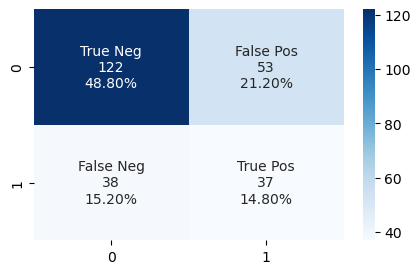

In [78]:
# Calculating different metrics
rf_tuned_model_train_perf = model_performance_classification(rf_tuned1, X_train, y_train)
print("Training performance:\n", rf_tuned_model_train_perf)
rf_tuned_model_test_perf = model_performance_classification(rf_tuned1, X_test, y_test)
print("Testing performance:\n", rf_tuned_model_test_perf)

# Creating confusion matrix
create_confusion_matrix(rf_tuned1, X_test, y_test, figsize=(5, 3))

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
import numpy as np

# Define the base model with class weights
rf_tuned2 = RandomForestClassifier(class_weight={0: 0.30, 1: 0.70}, random_state=1)

# Define the parameter grid with wider ranges
param_distributions = {
    "max_depth": [5, 10, 15],
    "max_features": ['sqrt', 'log2'],
    "max_samples": [0.7, 0.8],
    "min_samples_split": [7, 10],
    "min_samples_leaf": [6, 12],
    "n_estimators":[50, 100, 500],
    "min_impurity_decrease": [0.0, 0.001]
}


# Define the scoring metric
scorer = metrics.make_scorer(metrics.precision_score)

# Set up the RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_tuned1,
    param_distributions=param_distributions,
    n_iter=50,  # Number of random combinations to try
    scoring=scorer,  # Optimize for precision
    cv=3,            # 3-fold cross-validation
    n_jobs=-1,       # Use all available cores
    random_state=42, # For reproducibility
    verbose=2        # Show detailed logs
)

# Fit the RandomizedSearchCV
random_search.fit(X_train, y_train)

# Output the best parameters and model
print("Best parameters found: ", random_search.best_params_)
rf_tuned2 = random_search.best_estimator_




Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END max_depth=5, max_features=0.7, max_samples=0.8999999999999999, min_impurity_decrease=0.01, min_samples_split=5, n_estimators=150; total time=   0.1s
[CV] END max_depth=5, max_features=0.7, max_samples=0.8999999999999999, min_impurity_decrease=0.01, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=0.7, max_samples=0.9999999999999999, min_impurity_decrease=0.001, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=0.7, max_samples=0.9999999999999999, min_impurity_decrease=0.001, min_samples_split=8, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, max_features=0.7, max_samples=0.9999999999999999, min_impurity_decrease=0.001, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=0.7, max_samples=0.9999999999999999, min_impurity_decrease=0.001, min_samples_split=8, n_estimators=100; total ti

Training performance:
    Accuracy    Recall  Precision        F1
0  0.802667  0.768889   0.643123  0.700405
Testing performance:
    Accuracy    Recall  Precision        F1
0     0.652  0.546667    0.43617  0.485207


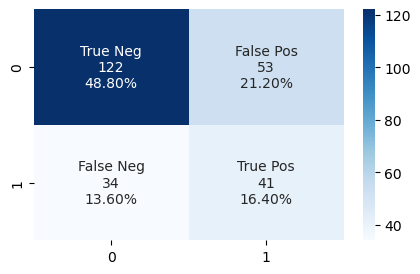

In [80]:
# Calculating different metrics
rf_tuned_model_train_perf = model_performance_classification(rf_tuned2, X_train, y_train)
print("Training performance:\n", rf_tuned_model_train_perf)
rf_tuned_model_test_perf = model_performance_classification(rf_tuned2, X_test, y_test)
print("Testing performance:\n", rf_tuned_model_test_perf)

# Creating confusion matrix
create_confusion_matrix(rf_tuned2, X_test, y_test, figsize=(5, 3))

In [81]:
#from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.model_selection import RandomizedSearchCV
#from sklearn.metrics import precision_score, classification_report

# Define the model
#model = GradientBoostingClassifier(random_state=42)

# Define hyperparameter grid
#param_grid = {
  #  'n_estimators': [100, 200, 300],
  #  'learning_rate': [0.01, 0.05, 0.1],
   # 'max_depth': [3, 5, 7],
   # 'min_samples_split': [2, 5, 10],
  #  'min_samples_leaf': [1, 2, 4]}

# Perform RandomizedSearchCV
#search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, cv=3, scoring='precision', random_state=42, n_jobs=-1)
#search.fit(X_train, y_train)

# Best model
#best_model = search.best_estimator_

# Evaluate
#y_pred = best_model.predict(X_test)
#print("Precision:", precision_score(y_test, y_pred))
#print(classification_report(y_test, y_pred))


In [82]:
# test performance comparison

models_test_comp_df = pd.concat(
    [
        model_performance_classification(dTree, X_test, y_test).T,
        model_performance_classification(dTree_tuned, X_test, y_test).T,
        model_performance_classification(bagging_model, X_test, y_test).T,
        model_performance_classification(bagging_model_tuned, X_test, y_test).T,
        model_performance_classification(rf, X_test, y_test).T,
        model_performance_classification(rf_tuned, X_test, y_test).T,
        model_performance_classification(rf_tuned1, X_test, y_test).T,
        model_performance_classification(rf_tuned2, X_test, y_test).T,

    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree full",
    "Decision Tree tuned",
    "Bagging Model",
    "Bagging Tuned model",
    "Random Forest",
    "Random Forest Tuned",
    "Random Forest Tuned1",
    "Random Forest Tuned2",

]
print("test performance comparison:")
models_test_comp_df

test performance comparison:


,Decision Tree full,Decision Tree tuned,Bagging Model,Bagging Tuned model,Random Forest,Random Forest Tuned,Random Forest Tuned1,Random Forest Tuned2
Accuracy,0.624000,0.712000,0.656000,0.716000,0.680000,0.696000,0.636000,0.652000
Recall,0.413333,0.146667,0.293333,0.346667,0.253333,0.320000,0.493333,0.546667
Precision,0.382716,0.578947,0.400000,0.541667,0.441860,0.489796,0.411111,0.436170
F1,0.397436,0.234043,0.338462,0.422764,0.322034,0.387097,0.448485,0.485207


In [83]:
#Clearly, the decision tree Tuned has given the  good performance and highest Precision. We can choose this as our final model

In [84]:
#Our model can detect 58% of potential defaulters 


In [85]:
#Age	credit_Amt	Duration	Sex_male	Job_skilled	Job_unskilled_and_non-resident	Housing_own	Housing_rent	savings_Acc_moderate	savings_Acc_quite rich	savings_Acc_rich	checking_Acc_moderate	checking_Acc_rich	Purpose_car	Purpose_domestic appliances	Purpose_education	Purpose_furniture/equipment	Purpose_radio/TV	Purpose_repairs	Purpose_vacation/others
#35	            1919	9	        True	True	False	False	True	False	False	False	True	False	False	False	False	True	False	False	False

In [86]:
X_train.head(5)

,Age,credit_Amt,Duration,Sex_male,Job_skilled,Job_unskilled_and_non-resident,Housing_own,Housing_rent,savings_Acc_moderate,savings_Acc_quite rich,savings_Acc_rich,checking_Acc_moderate,checking_Acc_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
103,35,1919,9,True,True,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False
550,23,996,12,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False
531,28,2631,15,False,True,False,False,True,True,False,False,True,False,True,False,False,False,False,False,False
466,29,1659,24,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False
264,32,1231,10,True,False,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False


In [87]:
import pandas as pd

# New customer data
newCustomer = pd.DataFrame(
    [
        {
            "Age": 50,
            "credit_Amt": 5000,
            "Duration": 5,
            "Sex_male": True,
            "Job_skilled": True,
            "Job_unskilled_and_non-resident": False,
            "Housing_own": False,
            "Housing_rent": True,
            "savings_Acc_moderate": False,
            "savings_Acc_quite rich": False,
            "savings_Acc_rich": False,
            "checking_Acc_moderate": True,
            "checking_Acc_rich": False,
            "Purpose_car": True,
            "Purpose_domestic appliances": False,
            "Purpose_education": False,
            "Purpose_furniture/equipment": False,
            "Purpose_radio/TV": False,
            "Purpose_repairs": False,
            "Purpose_vacation/others": False,
        }
    ],
    columns=[
        "Age",
        "credit_Amt",
        "Duration",
        "Sex_male",
        "Job_skilled",
        "Job_unskilled_and_non-resident",
        "Housing_own",
        "Housing_rent",
        "savings_Acc_moderate",
        "savings_Acc_quite rich",
        "savings_Acc_rich",
        "checking_Acc_moderate",
        "checking_Acc_rich",
        "Purpose_car",
        "Purpose_domestic appliances",
        "Purpose_education",
        "Purpose_furniture/equipment",
        "Purpose_radio/TV",
        "Purpose_repairs",
        "Purpose_vacation/others",
    ],
)

newCustomer


,Age,credit_Amt,Duration,Sex_male,Job_skilled,Job_unskilled_and_non-resident,Housing_own,Housing_rent,savings_Acc_moderate,savings_Acc_quite rich,savings_Acc_rich,checking_Acc_moderate,checking_Acc_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,50,5000,5,True,True,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False
